<a href="https://colab.research.google.com/github/iftikaraliahmed/Scaler/blob/main/ipl_match_analysis_and_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
##importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/ramjidoolla/ipl-data-set')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: iftikar24
Your Kaggle Key: ··········


100%|██████████| 1.24M/1.24M [00:00<00:00, 102MB/s]

In [6]:
##loading the csv files into dataframes
match_df = pd.read_csv("ipl-data-set/matches.csv")
dlvr_df = pd.read_csv("ipl-data-set/deliveries.csv")
match_df.sample(10)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
414,415,IPL-2013,Kolkata,26-04-2013,Kings XI Punjab,Kolkata Knight Riders,Kings XI Punjab,bat,normal,0,Kolkata Knight Riders,0,6,JH Kallis,Eden Gardens,CK Nandan,S Ravi,NaN
256,257,IPL-2011,Mumbai,22-04-2011,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,8,0,Harbhajan Singh,Wankhede Stadium,Asad Rauf,AM Saheba,NaN
478,479,IPL-2014,Mumbai,03-05-2014,Kings XI Punjab,Mumbai Indians,Kings XI Punjab,bat,normal,0,Mumbai Indians,0,5,CJ Anderson,Wankhede Stadium,BNJ Oxenford,C Shamshuddin,NaN
628,629,IPL-2016,Visakhapatnam,21-05-2016,Kings XI Punjab,Rising Pune Supergiants,Kings XI Punjab,bat,normal,0,Rising Pune Supergiants,0,4,MS Dhoni,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,HDPK Dharmasena,Nitin Menon,NaN
722,11318,IPL-2019,Mumbai,13-04-2019,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,4,JC Buttler,Wankhede Stadium,Nitin Menon,Nanda Kishore,Marais Erasmus
705,11146,IPL-2019,Delhi,30-03-2019,Kolkata Knight Riders,Delhi Capitals,Delhi Capitals,field,tie,0,Delhi Capitals,0,0,P Shaw,Feroz Shah Kotla Ground,Anil Dandekar,Nitin Menon,Marais Erasmus
516,517,IPL-2014,Bangalore,01-06-2014,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,3,MK Pandey,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN
194,195,IPL-2010,Ahmedabad,26-03-2010,Deccan Chargers,Rajasthan Royals,Deccan Chargers,bat,normal,0,Rajasthan Royals,0,8,YK Pathan,"Sardar Patel Stadium, Motera",HDPK Dharmasena,SJA Taufel,NaN
598,599,IPL-2016,Delhi,27-04-2016,Gujarat Lions,Delhi Daredevils,Delhi Daredevils,field,normal,0,Gujarat Lions,1,0,CH Morris,Feroz Shah Kotla,M Erasmus,S Ravi,NaN
335,336,IPL-2012,Mumbai,22-04-2012,Mumbai Indians,Kings XI Punjab,Mumbai Indians,bat,normal,0,Kings XI Punjab,0,6,SE Marsh,Wankhede Stadium,S Ravi,RJ Tucker,NaN


In [7]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [8]:
dlvr_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [9]:
dlvr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

## **Exploratory Data Analysis**
* Looking at all the teams in the teams and winners' column
* Checking for missing values for the no result matches
* Encoding Team Names
* Visualizing the toss wins and match wins by each team

## **Looking at all the teams in the teams and winners' column**

In [10]:
match_df['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [11]:
match_df['team1'].value_counts()

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Delhi Capitals                   6
Name: team1, dtype: int64

In [12]:
match_df[match_df['winner'].isnull() == True]

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,IPL-2011,Delhi,21-05-2011,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,IPL-2015,Bangalore,29-04-2015,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,IPL-2015,Bangalore,17-05-2015,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,IPL-2019,Bengaluru,30-04-2019,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


In [13]:
##replacing null results with draw
match_df['winner'].fillna('Draw', inplace=True)

In [14]:
match_df[match_df['winner'].isnull() == True]

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3


## **Encoding Team Names**

In [15]:
team_encodings = {
    'Mumbai Indians': 1,
    'Kolkata Knight Riders': 2,
    'Royal Challengers Bangalore': 3,
    'Deccan Chargers': 4,
    'Chennai Super Kings': 5,    
    'Rajasthan Royals': 6,
    'Delhi Daredevils': 7,
    'Gujarat Lions': 8,
    'Kings XI Punjab': 9,
    'Sunrisers Hyderabad': 10,
    'Rising Pune Supergiants': 11,
    'Rising Pune Supergiant': 11,
    'Kochi Tuskers Kerala':12,
    'Pune Warriors': 13,
    'Delhi Capitals': 14,
    'Draw': 15
}

team_encode_dict = {'team1': team_encodings,
                    'team2': team_encodings,
                    'toss_winner': team_encodings,
                    'winner': team_encodings
                   }
match_df.replace(team_encode_dict, inplace=True)
match_df.head()                  

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,10,3,3,field,normal,0,10,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,1,11,11,field,normal,0,11,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,8,2,2,field,normal,0,2,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,11,9,9,field,normal,0,9,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,3,7,3,bat,normal,0,3,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [16]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    int64 
 5   team2            756 non-null    int64 
 6   toss_winner      756 non-null    int64 
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           756 non-null    int64 
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

## **Exploring City Column**

In [17]:
match_df['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cuttack             7
Ranchi              7
Port Elizabeth      7
Cape Town           7
Abu Dhabi           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: city, dtype: int64

In [18]:
## checking for missing values
match_df[match_df['city'].isnull() == True ]

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,IPL-2014,NaN,19-04-2014,1,3,3,field,normal,0,3,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,IPL-2014,NaN,19-04-2014,2,7,2,bat,normal,0,7,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,IPL-2014,NaN,23-04-2014,5,6,6,field,normal,0,5,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,IPL-2014,NaN,25-04-2014,10,7,10,bat,normal,0,10,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,IPL-2014,NaN,25-04-2014,1,5,1,bat,normal,0,5,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,IPL-2014,NaN,28-04-2014,3,9,9,field,normal,0,9,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,IPL-2014,NaN,30-04-2014,10,1,1,field,normal,0,10,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


#### **All the missing values in the city column are for the matches that were played at Dubai International Stadium**

In [19]:
match_df['city'].fillna('Dubai',inplace=True)
match_df.describe()

,id,team1,team2,toss_winner,dl_applied,winner,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,5.554233,5.604497,5.462963,0.025132,5.416667,13.283069,3.350529
std,3464.478148,3.389656,3.411850,3.361638,0.156630,3.421736,23.471144,3.387963
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,189.750000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,0.000000
50%,378.500000,5.000000,5.000000,5.000000,0.000000,5.000000,0.000000,4.000000
75%,567.250000,9.000000,8.000000,8.000000,0.000000,8.000000,19.000000,6.000000
max,11415.000000,14.000000,14.000000,14.000000,1.000000,15.000000,146.000000,10.000000


## **Dropping all the redundant columns**

In [20]:
match_df = match_df[['id', 'team1','team2','city','toss_decision','toss_winner','venue','winner']]
match_df.head()

,id,team1,team2,city,toss_decision,toss_winner,venue,winner
0,1,10,3,Hyderabad,field,3,"Rajiv Gandhi International Stadium, Uppal",10
1,2,1,11,Pune,field,11,Maharashtra Cricket Association Stadium,11
2,3,8,2,Rajkot,field,2,Saurashtra Cricket Association Stadium,2
3,4,11,9,Indore,field,9,Holkar Cricket Stadium,9
4,5,3,7,Bangalore,bat,3,M Chinnaswamy Stadium,3


In [21]:
match_df.describe()

,id,team1,team2,toss_winner,winner
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,5.554233,5.604497,5.462963,5.416667
std,3464.478148,3.389656,3.411850,3.361638,3.421736
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,189.750000,3.000000,3.000000,2.000000,2.000000
50%,378.500000,5.000000,5.000000,5.000000,5.000000
75%,567.250000,9.000000,8.000000,8.000000,8.000000
max,11415.000000,14.000000,14.000000,14.000000,15.000000


## Toss Wins & Match Wins by each team

In [22]:
##looking at number of toss wins and match wins
toss_wins = match_df['winner'].value_counts(sort=True)
match_wins = match_df['winner'].value_counts(sort=True)

In [23]:
for idx, val in toss_wins.iteritems():
    print(f"{list(team_encode_dict['winner'].keys())[idx-1]} -> {toss_wins[idx]}")

Mumbai Indians -> 109
Chennai Super Kings -> 100
Kolkata Knight Riders -> 92
Royal Challengers Bangalore -> 84
Kings XI Punjab -> 82
Rajasthan Royals -> 75
Delhi Daredevils -> 67
Sunrisers Hyderabad -> 58
Deccan Chargers -> 29
Rising Pune Supergiants -> 15
Gujarat Lions -> 13
Kochi Tuskers Kerala -> 12
Pune Warriors -> 10
Rising Pune Supergiant -> 6
Delhi Capitals -> 4


## Plotting Wins by each team on a Histogram

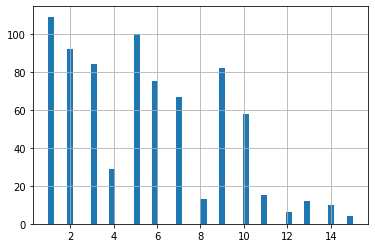

In [24]:
match_df['winner'].hist(bins=50)

In [25]:
match_df['winner'].value_counts()

1     109
5     100
2      92
3      84
9      82
6      75
7      67
10     58
4      29
11     15
8      13
13     12
14     10
12      6
15      4
Name: winner, dtype: int64

Text(0.5, 1.0, 'Match winners')

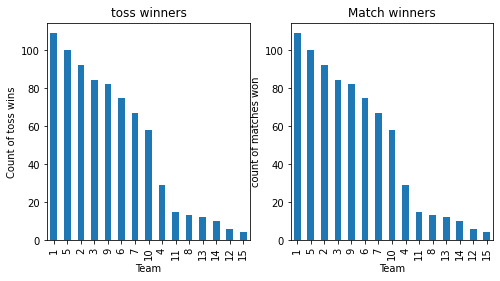

In [26]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Team')
ax1.set_ylabel('Count of toss wins')
ax1.set_title("toss winners")
toss_wins.plot(kind='bar')

ax2 = fig.add_subplot(122)
match_wins.plot(kind = 'bar')
ax2.set_xlabel('Team')
ax2.set_ylabel('count of matches won')
ax2.set_title("Match winners")

In [27]:
match_df.isnull().sum()

id               0
team1            0
team2            0
city             0
toss_decision    0
toss_winner      0
venue            0
winner           0
dtype: int64

### **Data Preparation**
##### **Encoding all the remaining features**

* city
* toss_decision
* date

In [28]:
##using the label encoder
from sklearn.preprocessing import LabelEncoder

ftr_list = ['city', 'toss_decision', 'venue']
encoder = LabelEncoder()
for ftr in ftr_list:
    match_df[ftr] = encoder.fit_transform(match_df[ftr])
    print(encoder.classes_)

match_df

['Abu Dhabi' 'Ahmedabad' 'Bangalore' 'Bengaluru' 'Bloemfontein'
 'Cape Town' 'Centurion' 'Chandigarh' 'Chennai' 'Cuttack' 'Delhi'
 'Dharamsala' 'Dubai' 'Durban' 'East London' 'Hyderabad' 'Indore' 'Jaipur'
 'Johannesburg' 'Kanpur' 'Kimberley' 'Kochi' 'Kolkata' 'Mohali' 'Mumbai'
 'Nagpur' 'Port Elizabeth' 'Pune' 'Raipur' 'Rajkot' 'Ranchi' 'Sharjah'
 'Visakhapatnam']
['bat' 'field']
['ACA-VDCA Stadium' 'Barabati Stadium' 'Brabourne Stadium' 'Buffalo Park'
 'De Beers Diamond Oval' 'Dr DY Patil Sports Academy'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Dubai International Cricket Stadium' 'Eden Gardens' 'Feroz Shah Kotla'
 'Feroz Shah Kotla Ground' 'Green Park'
 'Himachal Pradesh Cricket Association Stadium' 'Holkar Cricket Stadium'
 'IS Bindra Stadium' 'JSCA International Stadium Complex' 'Kingsmead'
 'M Chinnaswamy Stadium' 'M. A. Chidambaram Stadium'
 'M. Chinnaswamy Stadium' 'MA Chidambaram Stadium, Chepauk'
 'Maharashtra Cricket Association Stadium' 'Nehru Stadium'
 'New 

,id,team1,team2,city,toss_decision,toss_winner,venue,winner
0,1,10,3,15,1,3,28,10
1,2,1,11,27,1,11,21,11
2,3,8,2,29,1,2,31,2
3,4,11,9,16,1,9,13,9
4,5,3,7,2,0,3,17,3
...,...,...,...,...,...,...,...,...
751,11347,2,1,24,1,1,40,1
752,11412,5,1,8,0,5,18,1
753,11413,10,14,32,1,14,0,14
754,11414,14,5,32,1,5,0,5


## **Machine Learning & Prediction**

In [29]:
##splitting the data for training and testing

from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(match_df, test_size=0.2, random_state=42)
print(train_df.shape)
print(test_df.shape)

(604, 8)
(152, 8)


In [34]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np


def print_model_scores(model, data, predictors, target):
   
    model.fit(data[predictors], data[target])
    predictions = model.predict(data[predictors])
    accuracy = accuracy_score(predictions,data[target])
    print('Accuracy : %s' % '{0:.2%}'.format(accuracy))
    scores = cross_val_score(model, data[predictors], data[target], scoring="neg_mean_squared_error", cv=5)
    print('Cross-Validation Score :{}'.format(np.sqrt(-scores)))
    print(f"Average RMSE: {np.sqrt(-scores).mean()}")

 '''
    A generic function to generate the performance report of the
    model in question on the data passed to it using cross-validation
    
    Args:
        model: ML Model to be checked
        data: data on which the model needs to pe trained
        predictors: independent feature variable
        target: target variable
    '''

Logistic Regression

In [35]:
# logistic regression

target_var=['winner']
predictor_var = ['team1','team2','venue', 'toss_winner', 'city', 'toss_decision']
model = LogisticRegression()
print_model_scores(model, train_df, predictor_var, target_var)

Accuracy : 33.61%
Cross-Validation Score :[3.35748824 3.3028913  3.76697261 3.3990762  3.51069794]
Average RMSE: 3.4674252559214933


Random Forest Classifier

In [36]:
#random Forest Classifier

model = RandomForestClassifier(n_estimators=100)
target_var = ['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
print_model_scores(model, match_df,predictor_var, target_var)

Accuracy : 88.10%
Cross-Validation Score :[2.95024531 3.47650582 3.54815501 3.75402654 3.59174919]
Average RMSE: 3.4641363726033148


Sample Prediction

In [37]:
team1='Mumbai Indians'
team2='Sunrisers Hyderabad'
toss_winner='Sunrisers Hyderabad'
inp = [team_encode_dict['team1'][team1],team_encode_dict['team2'][team2],'14',team_encode_dict['toss_winner'][toss_winner],'2','1']
inp = np.array(inp).reshape((1, -1))
print(inp)
output=model.predict(inp)
print(f"The winner would be: {list(team_encodings.keys())[list(team_encode_dict['team1'].values()).index(output)]}")

[['1' '10' '14' '10' '2' '1']]
The winner would be: Sunrisers Hyderabad


Feature Importance

In [38]:
pd.Series(index= predictor_var, data=model.feature_importances_)

team1            0.224602
team2            0.251398
venue            0.172774
toss_winner      0.163878
city             0.156493
toss_decision    0.030855
dtype: float64

Running Model on Unseen data

In [39]:
print_model_scores(model, test_df, predictor_var, target_var)

Accuracy : 95.39%
Cross-Validation Score :[3.95539648 4.01207854 3.03864005 2.36643191 3.55434007]
Average RMSE: 3.385377408952318


In [40]:
match_df[match_df['winner'] == match_df['toss_winner']]

,id,team1,team2,city,toss_decision,toss_winner,venue,winner
1,2,1,11,27,1,11,21,11
2,3,8,2,29,1,2,31,2
3,4,11,9,16,1,9,13,9
4,5,3,7,2,0,3,17,3
5,6,8,10,15,1,10,28,10
...,...,...,...,...,...,...,...,...
750,11346,5,9,23,1,9,14,9
751,11347,2,1,24,1,1,40,1
753,11413,10,14,32,1,14,0,14
754,11414,14,5,32,1,5,0,5


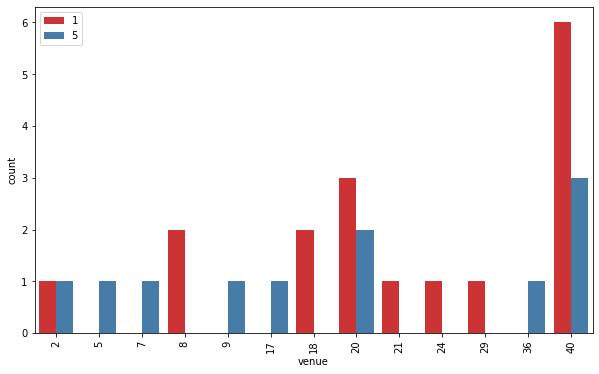

In [42]:
import seaborn as sns
team1=team_encodings['Mumbai Indians']
team2=team_encodings['Chennai Super Kings']
mtemp=match_df[((match_df['team1']==team1)|(match_df['team2']==team1))&((match_df['team1']==team2)|(match_df['team2']==team2))]
sns.countplot(x='venue', hue='winner',data=mtemp, palette='Set1')
plt.xticks(rotation='vertical')
leg = plt.legend( loc = 'upper left')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

Taking it a step further: Adding Variables

In [43]:
batsman_grp = dlvr_df.groupby(['match_id', 'batting_team'])
batsmen = batsman_grp['batsman_runs'].sum().reset_index()
batsmen

,match_id,batting_team,batsman_runs
0,1,Royal Challengers Bangalore,166
1,1,Sunrisers Hyderabad,200
2,2,Mumbai Indians,176
3,2,Rising Pune Supergiant,183
4,3,Gujarat Lions,179
...,...,...,...
1505,11413,Sunrisers Hyderabad,162
1506,11414,Chennai Super Kings,151
1507,11414,Delhi Capitals,147
1508,11415,Chennai Super Kings,148


In [45]:
match = pd.read_csv("ipl-data-set/matches.csv")
match = match[match['winner'].isnull() != True]
teams = match.groupby(['id', 'team1', 'team2'])['winner'].sum().reset_index()
teams['id']

0          1
1          2
2          3
3          4
4          5
       ...  
747    11347
748    11412
749    11413
750    11414
751    11415
Name: id, Length: 752, dtype: int64

In [46]:
teams

,id,team1,team2,winner
0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad
1,2,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant
2,3,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders
3,4,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab
4,5,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore
...,...,...,...,...
747,11347,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians
748,11412,Chennai Super Kings,Mumbai Indians,Mumbai Indians
749,11413,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals
750,11414,Delhi Capitals,Chennai Super Kings,Chennai Super Kings


In [47]:
# teams = teams[teams['id']!= [301]]
# batsmen = batsmen[batsmen['match_id'] != [301, 545]]

append_dict = {'match_id': list(teams['id']),
              'team1': list(teams['team2']),
              'team2': list(teams['team1']),
              'team1_score': [],
              'team2_score': [],
               'winner': list(teams['winner'])
              }

for match_id, team in zip(list(teams['id']), list(teams['team1'])):
    append_dict['team1_score'].append(int(batsmen.query('match_id == @match_id and batting_team == @team')['batsman_runs']))

for match_id, team in zip(list(teams['id']), list(teams['team2'])):
    append_dict['team2_score'].append(int(batsmen.query('match_id == @match_id and batting_team == @team')['batsman_runs']))
  
df = pd.DataFrame(append_dict)
    

In [48]:
df

,match_id,team1,team2,team1_score,team2_score,winner
0,1,Royal Challengers Bangalore,Sunrisers Hyderabad,200,166,Sunrisers Hyderabad
1,2,Rising Pune Supergiant,Mumbai Indians,176,183,Rising Pune Supergiant
2,3,Kolkata Knight Riders,Gujarat Lions,179,169,Kolkata Knight Riders
3,4,Kings XI Punjab,Rising Pune Supergiant,157,154,Kings XI Punjab
4,5,Delhi Daredevils,Royal Challengers Bangalore,151,137,Royal Challengers Bangalore
...,...,...,...,...,...,...
747,11347,Mumbai Indians,Kolkata Knight Riders,133,134,Mumbai Indians
748,11412,Mumbai Indians,Chennai Super Kings,131,132,Mumbai Indians
749,11413,Delhi Capitals,Sunrisers Hyderabad,162,165,Delhi Capitals
750,11414,Chennai Super Kings,Delhi Capitals,147,151,Chennai Super Kings


In [49]:
team_encodings = {
    'Mumbai Indians': 1,
    'Kolkata Knight Riders': 2,
    'Royal Challengers Bangalore': 3,
    'Deccan Chargers': 4,
    'Chennai Super Kings': 5,    
    'Rajasthan Royals': 6,
    'Delhi Daredevils': 7,
    'Gujarat Lions': 8,
    'Kings XI Punjab': 9,
    'Sunrisers Hyderabad': 10,
    'Rising Pune Supergiants': 11,
    'Rising Pune Supergiant': 11,
    'Kochi Tuskers Kerala':12,
    'Pune Warriors': 13,
    'Delhi Capitals': 14,
    'Draw': 15
}

team_encode_dict = {'team1': team_encodings,
                    'team2': team_encodings,
                    'toss_winner': team_encodings,
                    'winner': team_encodings
                   }

df.replace(team_encode_dict, inplace=True)
df.head()

,match_id,team1,team2,team1_score,team2_score,winner
0,1,3,10,200,166,10
1,2,11,1,176,183,11
2,3,2,8,179,169,2
3,4,9,11,157,154,9
4,5,7,3,151,137,3


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752 entries, 0 to 751
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   match_id     752 non-null    int64
 1   team1        752 non-null    int64
 2   team2        752 non-null    int64
 3   team1_score  752 non-null    int64
 4   team2_score  752 non-null    int64
 5   winner       752 non-null    int64
dtypes: int64(6)
memory usage: 35.4 KB


In [51]:
cols_to_use = match_df.columns.difference(df.columns)
cols_to_use

Index(['city', 'id', 'toss_decision', 'toss_winner', 'venue'], dtype='object')

In [52]:
merged_df = pd.merge(df, match_df[cols_to_use], left_on='match_id', right_on='id', how='outer')
merged_df = merged_df.dropna()
merged_df = merged_df.drop('id', axis=1)

In [53]:
merged_df

,match_id,team1,team2,team1_score,team2_score,winner,city,toss_decision,toss_winner,venue
0,1.0,3.0,10.0,200.0,166.0,10.0,15,1,3,28
1,2.0,11.0,1.0,176.0,183.0,11.0,27,1,11,21
2,3.0,2.0,8.0,179.0,169.0,2.0,29,1,2,31
3,4.0,9.0,11.0,157.0,154.0,9.0,16,1,9,13
4,5.0,7.0,3.0,151.0,137.0,3.0,2,0,3,17
...,...,...,...,...,...,...,...,...,...,...
747,11347.0,1.0,2.0,133.0,134.0,1.0,24,1,1,40
748,11412.0,1.0,5.0,131.0,132.0,1.0,8,0,5,18
749,11413.0,14.0,10.0,162.0,165.0,14.0,32,1,14,0
750,11414.0,5.0,14.0,147.0,151.0,5.0,32,1,5,0


In [54]:
def categorize(val):
    if val < 50:
        return 1
    elif val >= 50 and val < 100:
        return 2
    elif val >= 100 and val < 150:
        return 3
    elif val >= 150 and val < 200:
        return 4
    else:
        return 5

cols = ['team1_score', 'team2_score']
for col in cols:
    merged_df[col] = merged_df[col].apply(categorize)
    
merged_df

,match_id,team1,team2,team1_score,team2_score,winner,city,toss_decision,toss_winner,venue
0,1.0,3.0,10.0,5,4,10.0,15,1,3,28
1,2.0,11.0,1.0,4,4,11.0,27,1,11,21
2,3.0,2.0,8.0,4,4,2.0,29,1,2,31
3,4.0,9.0,11.0,4,4,9.0,16,1,9,13
4,5.0,7.0,3.0,4,3,3.0,2,0,3,17
...,...,...,...,...,...,...,...,...,...,...
747,11347.0,1.0,2.0,3,3,1.0,24,1,1,40
748,11412.0,1.0,5.0,3,3,1.0,8,0,5,18
749,11413.0,14.0,10.0,4,4,14.0,32,1,14,0
750,11414.0,5.0,14.0,3,4,5.0,32,1,5,0


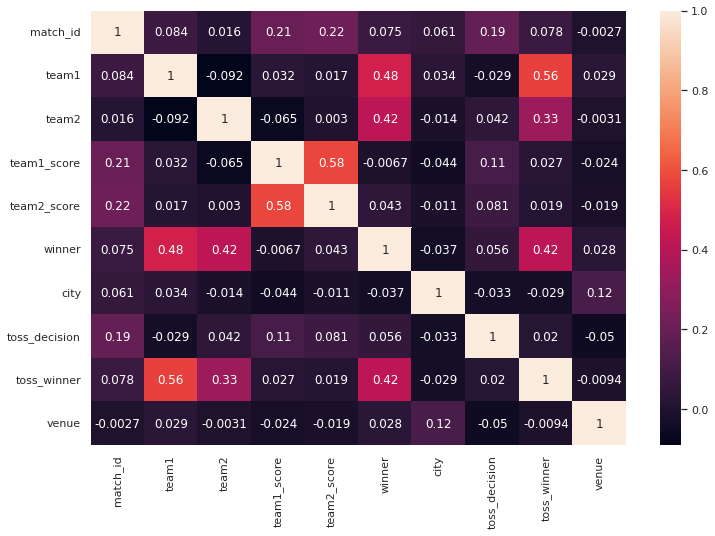

In [55]:
sns.set(rc={'figure.figsize':(12,8)})
ax = sns.heatmap(merged_df.corr(), annot=True)

1. Predict the winner using one hot encoding.
2. Analyse data for batting and bowling performances
3. Try to predict the category of score for a team?